In [39]:
from random import random 
from random import choice

In [40]:
patients_with_recurrence = [
    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5":True, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True
     },


    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": False, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": True, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},


    {"Menopause lt40": False, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},
     

]

In [41]:
patients_no_recurrence = [

    {"Menopause lt40": True, "Menopause ge40": False, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": False, "Deg-malig 3": True},

    {"Menopause lt40": False, "Menopause ge40": True, "Menopause premeno": False, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": False, "Deg-malig 2": True, "Deg-malig 3": False},

    {"Menopause lt40": False, "Menopause ge40": False, "Menopause premeno": True, 
     "Inv-Nodes 0-2": True, "Inv-Nodes 3-5":False, "Inv-Nodes 6-8": False, 
     "Deg-malig 1": True, "Deg-malig 2": False, "Deg-malig 3": False},

]

In [42]:
# Checks if the condition is satisfied 
def evaluate_condition(observation, condition):
    truth_value_of_condition = True

    for feature in observation:
        if feature in condition and observation[feature] == False:
            truth_value_of_condition = False
            break
        if 'NOT ' + feature in condition and observation[feature] == True:
            truth_value_of_condition = False
         
            break
    
    return truth_value_of_condition

In [43]:
class Memory:
    def __init__(self, forget_value, memorize_value, memory):
        self.memory = memory
        self.forget_value = forget_value
        self.memorize_value = memorize_value
    
    def get_memory(self):
        return self.memory
    
    def get_literals(self):
        return list(self.memory.keys())
    
    def get_condition(self):
        condition = []
        for literal in self.memory:
            if self.memory[literal] >= 6:
                condition.append(literal)
        return condition
        
    def memorize(self, literal):
        if random() <= self.memorize_value and self.memory[literal] < 10:
            self.memory[literal] += 1
            
    def forget(self, literal):
        if random() <= self.forget_value and self.memory[literal] > 1:
            self.memory[literal] -= 1
            
    def memorize_always(self, literal):
        if  self.memory[literal] < 10:
            self.memory[literal] += 1

In [44]:
# Recurrence rules
rule_1=  Memory(0.2, 0.8, {'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':10, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 1, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2':1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':10,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                         
                             })

rule_2=  Memory(0.2, 0.8,{'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':10, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 1, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2':1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':10,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                         
                             })

# Non-recurrence rule
rule_3 = Memory(0.2, 0.8, {'Menopause lt40':1, 'Menopause ge40':1, 'Menopause premeno':1, 
                             'NOT Menopause lt40':1, 'NOT Menopause ge40':1, 'NOT Menopause premeno':1, 
                             'Inv-Nodes 0-2': 10, 'Inv-Nodes 3-5':1, 'Inv-Nodes 6-8':1, 
                             'NOT Inv-Nodes 0-2': 1, 'NOT Inv-Nodes 3-5': 1, 'NOT Inv-Nodes 6-8': 1, 
                             'Deg-malig 1':1, 'Deg-malig 2': 1, 'Deg-malig 3':1,
                             'NOT Deg-malig 1':1, 'NOT Deg-malig 2':1, 'NOT Deg-malig 3':1,
                    
                             })


In [45]:

print("IF " + " AND ".join(rule_1.get_condition()) + " THEN Recurrence")

print("IF " + " AND ".join(rule_2.get_condition()) + " THEN Recurrence")

print("IF " + " AND ".join(rule_3.get_condition()) + " THEN No Recurrence")


IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
IF Inv-Nodes 0-2 THEN No Recurrence


In [46]:
rule_4_recurrence = Memory(0.2, 0.8, {'Menopause lt40':5, 'Menopause ge40':5, 'Menopause premeno':5, 
                             'NOT Menopause lt40':5, 'NOT Menopause ge40':5, 'NOT Menopause premeno':5, 
                             'Inv-Nodes 0-2': 5, 'Inv-Nodes 3-5':5, 'Inv-Nodes 6-8':5, 
                             'NOT Inv-Nodes 0-2': 5, 'NOT Inv-Nodes 3-5': 5, 'NOT Inv-Nodes 6-8': 5, 
                             'Deg-malig 1':5, 'Deg-malig 2': 5, 'Deg-malig 3':5,
                             'NOT Deg-malig 1':5, 'NOT Deg-malig 2':5, 'NOT Deg-malig 3':5,
                    
                             })


rule_5_no_recurrence = Memory(0.2, 0.8, {'Menopause lt40':5, 'Menopause ge40':5, 'Menopause premeno':5, 
                             'NOT Menopause lt40':5, 'NOT Menopause ge40':5, 'NOT Menopause premeno':5, 
                             'Inv-Nodes 0-2': 5, 'Inv-Nodes 3-5':5, 'Inv-Nodes 6-8':5, 
                             'NOT Inv-Nodes 0-2': 5, 'NOT Inv-Nodes 3-5': 5, 'NOT Inv-Nodes 6-8': 5, 
                             'Deg-malig 1':5, 'Deg-malig 2': 5, 'Deg-malig 3':5,
                             'NOT Deg-malig 1':5, 'NOT Deg-malig 2':5, 'NOT Deg-malig 3':5,
                    
                             })


In [47]:
def type_i_feedback(observation, memory):
    remaining_literals = memory.get_literals()
    if evaluate_condition(observation, memory.get_condition()) == True:
        for feature in observation:
            if observation[feature] == True:
                memory.memorize(feature)
                remaining_literals.remove(feature)
            elif observation[feature] == False:
    
                memory.memorize('NOT ' + feature)
                remaining_literals.remove('NOT ' + feature)
    for literal in remaining_literals:
        memory.forget(literal)


In [48]:
def type_ii_feedback(observation, memory):
    if evaluate_condition(observation, memory.get_condition()) == True:
        for feature in observation:
#             memorize the opposite of the key, do not touch the key itself 
            if observation[feature] == False:
                memory.memorize_always(feature)
            elif observation[feature] == True:
                memory.memorize_always('NOT ' + feature)

In [49]:
def classify(observation, car_rules, plane_rules):
    vote_sum = 0
    vote_sums = []
    for car_rule in car_rules:
        if evaluate_condition(observation, car_rule.get_condition()) == True:
            vote_sum += 1
            vote_sums.append(vote_sum)
    for plane_rule in plane_rules:
        if evaluate_condition(observation, plane_rule.get_condition()) == True:
            vote_sum -= 1
            vote_sums.append(vote_sum)
    print("Vote sum is ", vote_sum)
    
    if vote_sum >= 0:
        return "Recurrence", vote_sums
    else:
        return "No Recurrence", vote_sums
    

In [50]:
print("===================Classification Recurrence=====================")
print(classify(patients_with_recurrence[0], [rule_1, rule_2], [rule_3]))
print(classify(patients_with_recurrence[1], [rule_1, rule_2,], [rule_3]))
print(classify(patients_with_recurrence[2], [rule_1, rule_2], [rule_3]))

print("===================Classification Non Recurrence=====================")
print(classify(patients_no_recurrence[0], [rule_1, rule_2], [rule_3]))
print(classify(patients_no_recurrence[1], [rule_1, rule_2,], [rule_3]))
print(classify(patients_no_recurrence[2], [rule_1, rule_2,], [rule_3]))

===================Classification Recurrence=====================
Vote sum is  2
('Recurrence', [1, 2])
Vote sum is  2
('Recurrence', [1, 2])
Vote sum is  1
('Recurrence', [1, 2, 1])
===================Classification Non Recurrence=====================
Vote sum is  -1
('No Recurrence', [-1])
Vote sum is  -1
('No Recurrence', [-1])
Vote sum is  -1
('No Recurrence', [-1])


In [51]:
for i in range(100):
    observation_id = choice([0,1,2])
    recurrence = choice([0,1])
    if recurrence == 1:
        type_i_feedback(patients_with_recurrence[observation_id], rule_4_recurrence)
    else:
        type_ii_feedback(patients_no_recurrence[observation_id], rule_4_recurrence)

In [52]:
for i in range(100):
    observation_id = choice([0,1,2])
    recurrence = choice([0,1])
    if recurrence == 1:
        type_i_feedback(patients_no_recurrence[observation_id], rule_5_no_recurrence)
    else:
        type_ii_feedback(patients_with_recurrence[observation_id], rule_5_no_recurrence)

In [53]:

print("=========Rule 1==========")
print("IF " + " AND ".join(rule_1.get_condition()) + " THEN Recurrence")
print("=========Rule 2==========")
print("IF " + " AND ".join(rule_2.get_condition()) + " THEN Recurrence")
print("=========Rule 3==========")
print("IF " + " AND ".join(rule_3.get_condition()) + " THEN Non Recurrence")
print("=========Rule 4==========")
print("IF " + " AND ".join(rule_4_recurrence.get_condition()) + " THEN Recurrence")
print("=========Rule 5==========")
print("IF " + " AND ".join(rule_5_no_recurrence.get_condition()) + " THEN Non Recurrence")


=========Rule 1==========
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
=========Rule 2==========
IF NOT Menopause lt40 AND Deg-malig 3 THEN Recurrence
=========Rule 3==========
IF Inv-Nodes 0-2 THEN Non Recurrence
=========Rule 4==========
IF Menopause ge40 AND NOT Menopause lt40 AND Inv-Nodes 6-8 AND NOT Inv-Nodes 3-5 AND Deg-malig 3 AND NOT Deg-malig 1 AND NOT Deg-malig 2 THEN Recurrence
=========Rule 5==========
IF Menopause ge40 AND NOT Menopause lt40 AND NOT Menopause premeno AND Inv-Nodes 0-2 AND NOT Inv-Nodes 3-5 AND NOT Inv-Nodes 6-8 AND Deg-malig 2 AND NOT Deg-malig 1 AND NOT Deg-malig 3 THEN Non Recurrence


In [54]:
print("===================Classification Recurrence=====================")
print(classify(patients_with_recurrence[0], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_with_recurrence[1], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_with_recurrence[2], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))

print("===================Classification Non Recurrence=====================")
print(classify(patients_no_recurrence[0], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_no_recurrence[1], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))
print(classify(patients_no_recurrence[2], [rule_1, rule_2, rule_4_recurrence], [rule_3, rule_5_no_recurrence]))


===================Classification Recurrence=====================
Vote sum is  2
('Recurrence', [1, 2])
Vote sum is  3
('Recurrence', [1, 2, 3])
Vote sum is  1
('Recurrence', [1, 2, 1])
===================Classification Non Recurrence=====================
Vote sum is  -1
('No Recurrence', [-1])
Vote sum is  -2
('No Recurrence', [-1, -2])
Vote sum is  -1
('No Recurrence', [-1])


In [55]:
print(evaluate_condition(patients_no_recurrence[0], rule_1.get_condition()))
print(evaluate_condition(patients_no_recurrence[0], rule_2.get_condition()))
print(evaluate_condition(patients_no_recurrence[0], rule_3.get_condition()))

False
False
True


Draw plot (animation)

In [56]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from random import choice

IF Menopause ge40 AND Deg-malig 3 AND NOT Menopause lt40 AND NOT Menopause premeno AND NOT Inv-Nodes 0-2 AND NOT Deg-malig 1 AND NOT Deg-malig 2 THEN No Recurrence


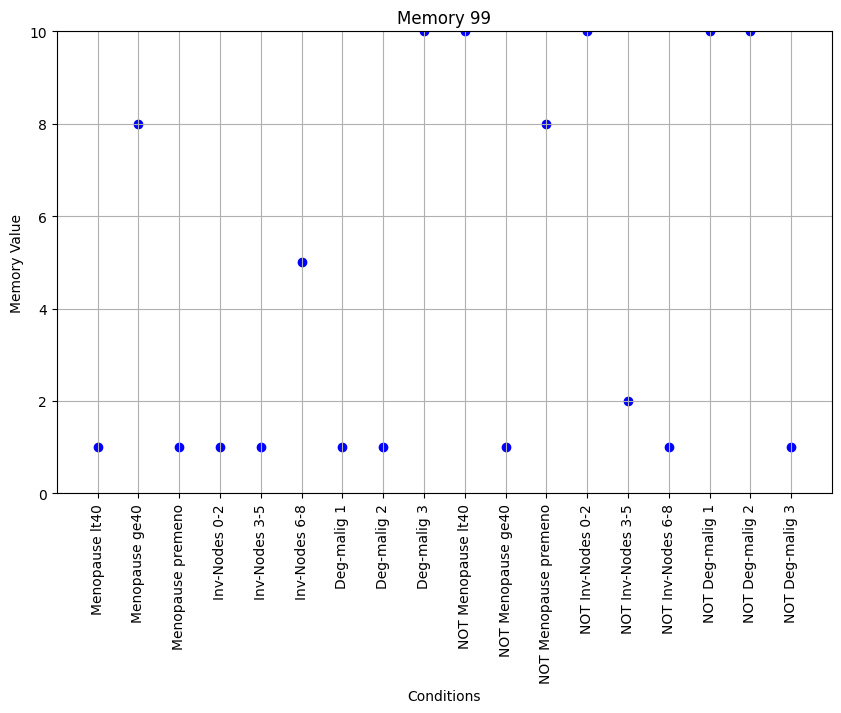

In [57]:
def plot(frame):
    ax.clear()
    
    x_positions = list(range(len(all_conditions))) 
    y_values = [condition_memory_values[condition][frame] for condition in all_conditions]  


    ax.scatter(x_positions, y_values, color='b')  
    ax.set_ylim([0, 10]) 
    ax.set_xlim([-1, len(all_conditions)]) 
    ax.set_xticks(x_positions)  
    ax.set_xticklabels(all_conditions, rotation=90) 
    ax.set_xlabel('Conditions') 
    ax.set_ylabel('Memory Value') 
    ax.set_title(f'Memory {frame}')  
    ax.grid(True)  


conditions = ['Menopause lt40', 'Menopause ge40', 'Menopause premeno', 
              'Inv-Nodes 0-2', 'Inv-Nodes 3-5', 'Inv-Nodes 6-8', 
              'Deg-malig 1', 'Deg-malig 2', 'Deg-malig 3']

negated_conditions = ['NOT ' + condition for condition in conditions]
all_conditions = conditions + negated_conditions

# Dictionary for memory values for conditions
condition_memory_values = {condition: [] for condition in all_conditions}

# Init memory for each condition
initial_memory_values = 5

rule_5_recurrence = Memory(0.5, 0.5, {condition: initial_memory_values for condition in all_conditions})

# Simulate feedback
for i in range(100):
    observation_id = choice([0, 1, 2])
    recurrence = choice([0, 1])

    # Feedback and memory values tracking for each condition
    if recurrence == 1:
        type_i_feedback(patients_with_recurrence[observation_id], rule_5_recurrence)
    else:
        type_ii_feedback(patients_no_recurrence[observation_id], rule_5_recurrence)

    # Track memory values for each condition 
    for condition in all_conditions:
        condition_memory_values[condition].append(rule_5_recurrence.memory[condition])

# Print rules for the last iteration
print("IF " + " AND ".join(rule_5_recurrence.get_condition()) + " THEN No Recurrence")

# Number of itarations
iterations = len(next(iter(condition_memory_values.values())))


fig, ax = plt.subplots(figsize=(10, 6)) 
ani = animation.FuncAnimation(fig, plot, frames=range(1, iterations), repeat=False)
ani.save('memory_evolution.mp4', writer='ffmpeg')
plt.show()
